### Import libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import glob
import os
import feather
from sklearn.decomposition import PCA
sns.set(style="whitegrid")

--------------------------------------

### Load calculated features

In [2]:
fullFeatMat = feather.read_dataframe('data/EmpFeatMat.feather')
filt        = feather.read_dataframe('data/fullFeatMatFilt.feather')

--------------------------------------

### Compute PCA

In [3]:
def getVariances(df, totalLength):
    pca = PCA().fit(df)
    
    # calculates all variances
    variances = pca.explained_variance_ratio_

    variance_values = totalLength * [1]

    j = 0
    for i in range(1,len(variances)+1):
        variance_values[j] = np.sum(variances[:i])
        j += 1
        
    atLeast90 = [i for i in variance_values if i >= 0.9]
    smallestOne = min(atLeast90)
    
    # stores the smallest number of PCs necessary to cover at least 90% of the variance
    smallestPC = (variance_values.index(smallestOne)+1) / totalLength * 100
    
    # for plotting
    percentage = [(i / totalLength)*100 for i in list(range(1, totalLength+1))]
    
    # in Prozent
    variance_values = [i * 100 for i in variance_values]
        
    return smallestPC, variance_values, percentage

In [4]:
methods = fullFeatMat['method'].unique()

# stores the smallest #PC of the corresponding method
smallestPC_value = []
all_varianceValues = []
all_percentages = []

for method in methods:
    print('Doing ', method)
    
    # features as columns, a row correspond to a time series
    tempFrame = pd.pivot_table(filt[filt['method'] == method], index=['id'], columns=['names'])
    tempFrame = tempFrame.dropna()
    
    # how many feature the method has in total
    nbrFeats = len(fullFeatMat[fullFeatMat['method'] == method]['names'].unique())
    
    smallestPC, varianceValues, percentage = getVariances(tempFrame, nbrFeats)
    
    smallestPC_value.append(smallestPC)
    all_varianceValues.append(varianceValues)
    all_percentages.append(percentage)
    
# sort descending
tp = [(m, v) for m,v in zip(methods, smallestPC_value)]
tp.sort(key=lambda x: x[1], reverse=True)

Doing  catch22
Doing  kats


/tmp/ipykernel_577/1123017998.py:12: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  tempFrame = pd.pivot_table(filt[filt['method'] == method], index=['id'], columns=['names'])
/tmp/ipykernel_577/1123017998.py:12: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  tempFrame = pd.pivot_table(filt[filt['method'] == method], index=['id'], columns=['names'])


Doing  tsfel


/tmp/ipykernel_577/1123017998.py:12: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  tempFrame = pd.pivot_table(filt[filt['method'] == method], index=['id'], columns=['names'])


Doing  tsfresh


/tmp/ipykernel_577/1123017998.py:12: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  tempFrame = pd.pivot_table(filt[filt['method'] == method], index=['id'], columns=['names'])


Doing  tsfeatures


/tmp/ipykernel_577/1123017998.py:12: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  tempFrame = pd.pivot_table(filt[filt['method'] == method], index=['id'], columns=['names'])


--------------------------------------

### Plot barplot

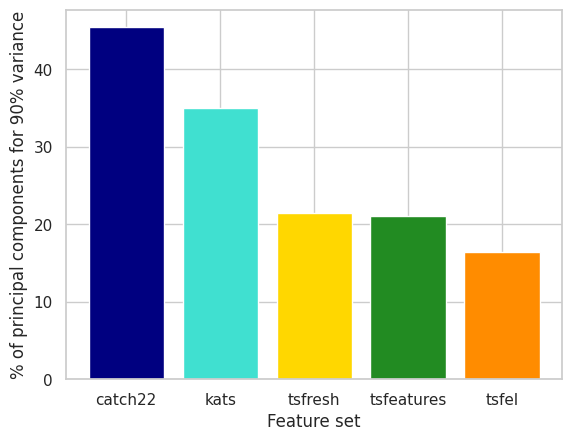

In [31]:
fig, ax = plt.subplots()

y_pos = np.arange(len(methods))
colours = ['navy', 'turquoise', 'gold', 'forestgreen', 'darkorange']

# Create bars
plt.bar(y_pos, [v for (m,v) in tp], color=colours)

# Create names on the x-axis
plt.xticks(y_pos, [m for (m,v) in tp])

# Show graphic
plt.xlabel('Feature set')
plt.ylabel('% of principal components for 90% variance')
plt.show()

fig.savefig('outputs/pca1.pdf')

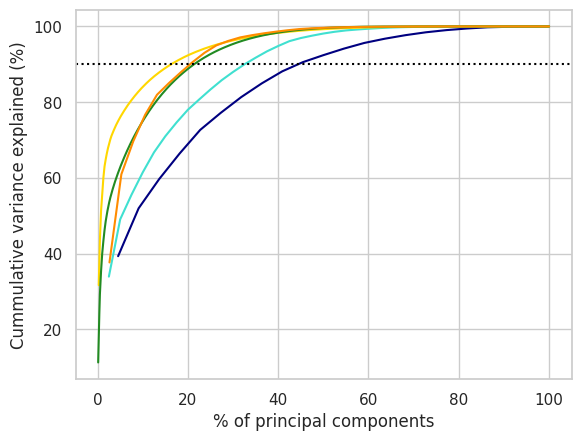

In [32]:
fig, ax = plt.subplots()

for i in range(len(all_varianceValues)):
    ax = sns.lineplot(x=all_percentages[i], y=all_varianceValues[i], color=colours[i])

plt.axhline(y = 90, color = 'black', linestyle = 'dotted')
plt.xlabel('% of principal components')
plt.ylabel('Cummulative variance explained (%)')
plt.show()

fig.savefig('outputs/pca2.pdf')

--------------------------------------